In [643]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
from matplotlib.colors import ListedColormap
import nltk
import warnings
warnings.filterwarnings('ignore')
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

In [644]:
df= pd.read_csv('/content/drive/MyDrive/spam.csv', encoding='latin-1')
print(df)

        v1                                                 v2 Unnamed: 2  \
0      ham  Go until jurong point, crazy.. Available only ...        NaN   
1      ham                      Ok lar... Joking wif u oni...        NaN   
2     spam  Free entry in 2 a wkly comp to win FA Cup fina...        NaN   
3      ham  U dun say so early hor... U c already then say...        NaN   
4      ham  Nah I don't think he goes to usf, he lives aro...        NaN   
...    ...                                                ...        ...   
5567  spam  This is the 2nd time we have tried 2 contact u...        NaN   
5568   ham              Will Ì_ b going to esplanade fr home?        NaN   
5569   ham  Pity, * was in mood for that. So...any other s...        NaN   
5570   ham  The guy did some bitching but I acted like i'd...        NaN   
5571   ham                         Rofl. Its true to its name        NaN   

     Unnamed: 3 Unnamed: 4  
0           NaN        NaN  
1           NaN        NaN  


In [645]:
df.head(10)

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN
5,spam,FreeMsg Hey there darling it's been 3 week's n...,NaN,NaN,NaN
6,ham,Even my brother is not like to speak with me. ...,NaN,NaN,NaN
7,ham,As per your request 'Melle Melle (Oru Minnamin...,NaN,NaN,NaN
8,spam,WINNER!! As a valued network customer you have...,NaN,NaN,NaN
9,spam,Had your mobile 11 months or more? U R entitle...,NaN,NaN,NaN


In [646]:
df.tail(10)

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
5562,ham,Ok lor... Sony ericsson salesman... I ask shuh...,NaN,NaN,NaN
5563,ham,Ard 6 like dat lor.,NaN,NaN,NaN
5564,ham,Why don't you wait 'til at least wednesday to ...,NaN,NaN,NaN
5565,ham,Huh y lei...,NaN,NaN,NaN
5566,spam,REMINDER FROM O2: To get 2.50 pounds free call...,NaN,NaN,NaN
5567,spam,This is the 2nd time we have tried 2 contact u...,NaN,NaN,NaN
5568,ham,Will Ì_ b going to esplanade fr home?,NaN,NaN,NaN
5569,ham,"Pity, * was in mood for that. So...any other s...",NaN,NaN,NaN
5570,ham,The guy did some bitching but I acted like i'd...,NaN,NaN,NaN
5571,ham,Rofl. Its true to its name,NaN,NaN,NaN


In [647]:
df.shape

(5572, 5)

In [648]:
df.columns

Index(['v1', 'v2', 'Unnamed: 2', 'Unnamed: 3', 'Unnamed: 4'], dtype='object')

In [649]:
df.describe()

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
count,5572,5572,50,12,6
unique,2,5169,43,10,5
top,ham,"Sorry, I'll call later","bt not his girlfrnd... G o o d n i g h t . . .@""","MK17 92H. 450Ppw 16""","GNT:-)"""
freq,4825,30,3,2,2


In [650]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   v1          5572 non-null   object
 1   v2          5572 non-null   object
 2   Unnamed: 2  50 non-null     object
 3   Unnamed: 3  12 non-null     object
 4   Unnamed: 4  6 non-null      object
dtypes: object(5)
memory usage: 217.8+ KB


In [651]:
df.isnull()

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,False,False,True,True,True
1,False,False,True,True,True
2,False,False,True,True,True
3,False,False,True,True,True
4,False,False,True,True,True
...,...,...,...,...,...
5567,False,False,True,True,True
5568,False,False,True,True,True
5569,False,False,True,True,True
5570,False,False,True,True,True


In [652]:
df.isnull().sum()

v1               0
v2               0
Unnamed: 2    5522
Unnamed: 3    5560
Unnamed: 4    5566
dtype: int64

In [653]:
df = df.where((pd.notnull(df)),'')
print(df)

        v1                                                 v2 Unnamed: 2  \
0      ham  Go until jurong point, crazy.. Available only ...              
1      ham                      Ok lar... Joking wif u oni...              
2     spam  Free entry in 2 a wkly comp to win FA Cup fina...              
3      ham  U dun say so early hor... U c already then say...              
4      ham  Nah I don't think he goes to usf, he lives aro...              
...    ...                                                ...        ...   
5567  spam  This is the 2nd time we have tried 2 contact u...              
5568   ham              Will Ì_ b going to esplanade fr home?              
5569   ham  Pity, * was in mood for that. So...any other s...              
5570   ham  The guy did some bitching but I acted like i'd...              
5571   ham                         Rofl. Its true to its name              

     Unnamed: 3 Unnamed: 4  
0                           
1                           


In [654]:
df.isna().sum()

v1            0
v2            0
Unnamed: 2    0
Unnamed: 3    0
Unnamed: 4    0
dtype: int64

In [655]:
df.drop(['Unnamed: 2','Unnamed: 3', 'Unnamed: 4'], axis = 1, inplace = True)

In [656]:
df.shape

(5572, 2)

In [657]:
df.head()

,v1,v2
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [658]:
df.rename(columns={'v1':'Type','v2':'Message'}, inplace=True)

In [659]:
df.head()

,Type,Message
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [660]:
df.columns

Index(['Type', 'Message'], dtype='object')

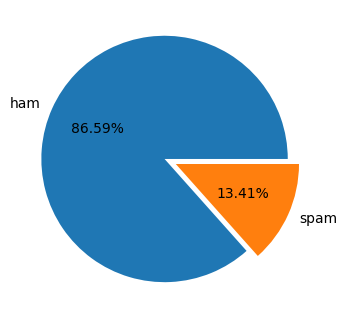

In [661]:
plt.figure(figsize=(4, 4))
plt.pie(df['Type'].value_counts(), labels=['ham', 'spam'], autopct='%0.2f%%', explode=[0.1, 0])
plt.show()

In [662]:
df['Message Length'] = df['Message'].apply(len)

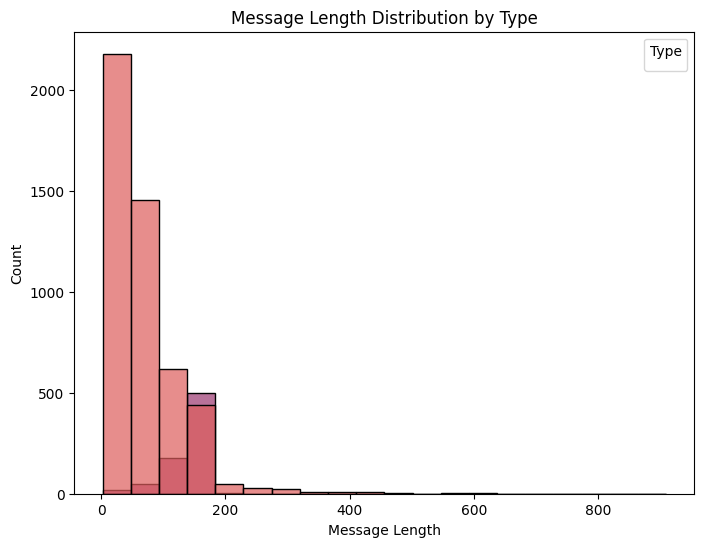

In [663]:
plt.figure(figsize=(8, 6))
sns.histplot(data=df, x='Message Length', hue='Type', bins=20, alpha=0.7, palette='flare')
plt.title('Message Length Distribution by Type')
plt.xlabel('Message Length')
plt.ylabel('Count')
plt.legend(title='Type')
plt.show()


In [664]:
from wordcloud import WordCloud

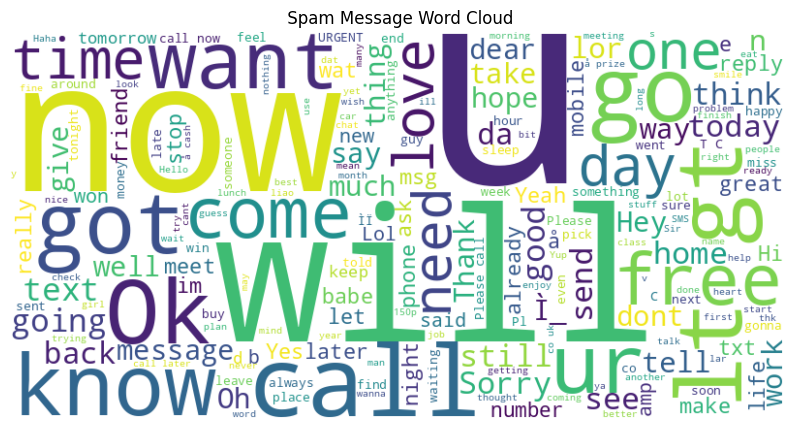

In [665]:
all_messages = ' '.join(df['Message'])

wordcloud = WordCloud(width=800, height=400, background_color='white').generate(all_messages)

plt.figure(figsize=(10, 6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.title(' Spam Message Word Cloud')
plt.axis('off')
plt.show()

In [666]:
from collections import Counter

In [667]:
spam_messages = ' '.join(df[df['Type'] == 'spam']['Message'])

In [668]:
words = spam_messages.split()
word_counts = Counter(words)


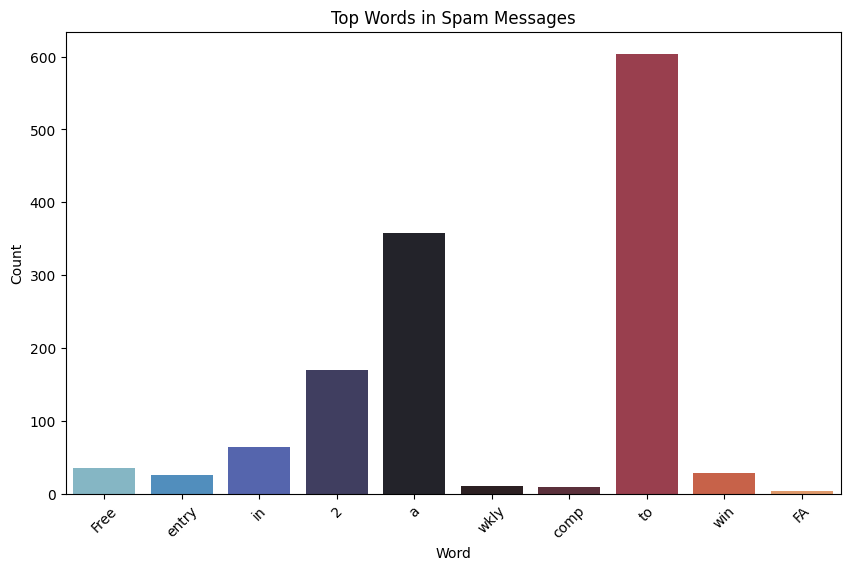

In [669]:
plt.figure(figsize=(10, 6))
sns.barplot(x=list(word_counts.keys())[:10], y=list(word_counts.values())[:10], palette='icefire')
plt.title('Top Words in Spam Messages')
plt.xlabel('Word')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()

In [670]:
df['Type'] = df['Type'].apply(lambda x: 1 if x == 'spam' else 0)


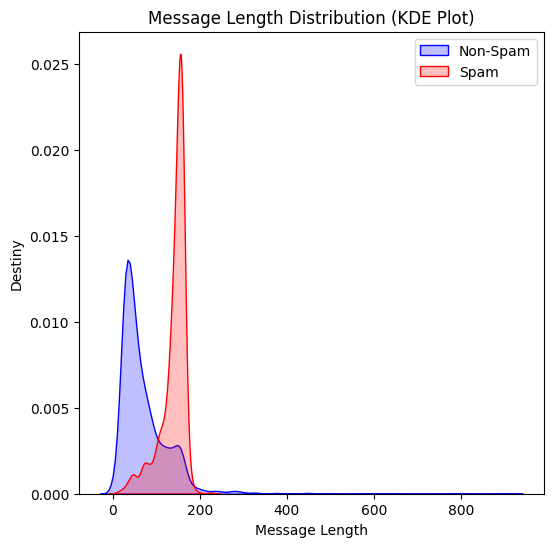

In [672]:
df['Message Length'] = df['Message'].apply(len)
plt.figure(figsize=(6,6))
sns.kdeplot(df[df['Type'] == 0]['Message Length'],label ='Non-Spam',fill=True,color='blue')
sns.kdeplot(df[df['Type'] == 1]['Message Length'],label ='Spam',fill=True,color='red')
plt.xlabel('Message Length')
plt.ylabel('Destiny')
plt.title('Message Length Distribution (KDE Plot)')
plt.legend()
plt.show()

In [673]:
from textblob import TextBlob

In [674]:
df['Sentiment'] = df['Message'].apply(lambda x: TextBlob(x).sentiment.polarity)

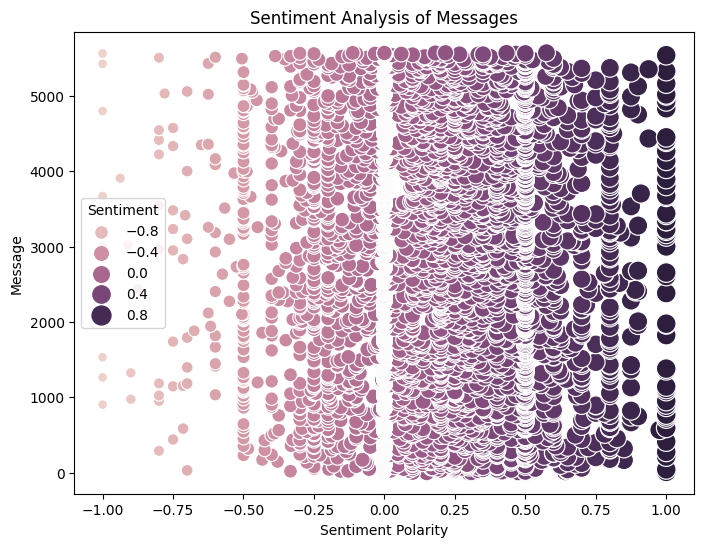

In [675]:
plt.figure(figsize=(8, 6))
sns.scatterplot(data=df, x='Sentiment', y=df.index, hue='Sentiment', size='Sentiment', sizes=(50, 200))
plt.title('Sentiment Analysis of Messages')
plt.xlabel('Sentiment Polarity')
plt.ylabel('Message')
plt.legend(title='Sentiment')
plt.show()

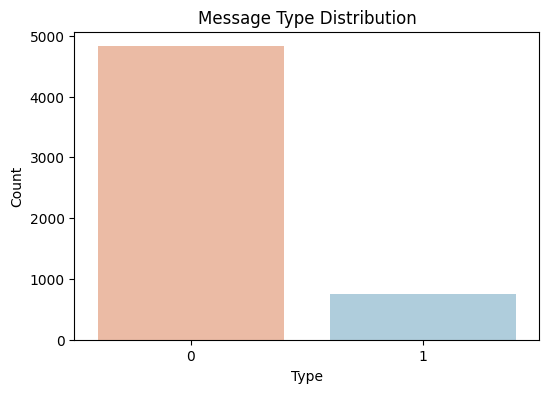

In [676]:
plt.figure(figsize=(6, 4))
sns.countplot(data=df, x='Type', palette='RdBu')
plt.title('Message Type Distribution')
plt.xlabel('Type')
plt.ylabel('Count')
plt.show()

In [677]:
pip install nltk

In [678]:
from collections import Counter
import nltk
nltk.download('all')
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize

[nltk_data] Downloading collection 'all'
[nltk_data]    | 
[nltk_data]    | Downloading package abc to /root/nltk_data...
[nltk_data]    |   Package abc is already up-to-date!
[nltk_data]    | Downloading package alpino to /root/nltk_data...
[nltk_data]    |   Package alpino is already up-to-date!
[nltk_data]    | Downloading package averaged_perceptron_tagger to
[nltk_data]    |     /root/nltk_data...
[nltk_data]    |   Package averaged_perceptron_tagger is already up-
[nltk_data]    |       to-date!
[nltk_data]    | Downloading package averaged_perceptron_tagger_ru to
[nltk_data]    |     /root/nltk_data...
[nltk_data]    |   Package averaged_perceptron_tagger_ru is already
[nltk_data]    |       up-to-date!
[nltk_data]    | Downloading package basque_grammars to
[nltk_data]    |     /root/nltk_data...
[nltk_data]    |   Package basque_grammars is already up-to-date!
[nltk_data]    | Downloading package bcp47 to /root/nltk_data...
[nltk_data]    |   Package bcp47 is already up-to-dat

In [679]:
stop_words = set(stopwords.words('english'))


In [680]:
all_words = [word.lower() for message in df['Message'] for word in word_tokenize(message) if word.isalpha() and word.lower() not in stop_words]
word_counts = Counter(all_words)


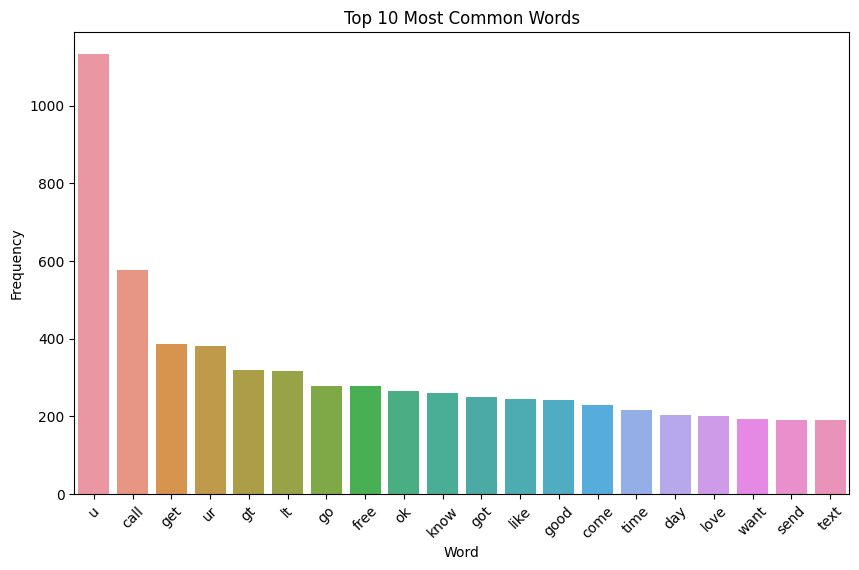

In [681]:
top_words = word_counts.most_common(20)

plt.figure(figsize=(10, 6))
sns.barplot(x=[word[0] for word in top_words], y=[word[1] for word in top_words])
plt.title('Top 10 Most Common Words')
plt.xlabel('Word')
plt.ylabel('Frequency')
plt.xticks(rotation=45)
plt.show()

In [682]:
df['Contains_Urgent'] = df['Message'].apply(lambda x: 'urgent' in x.lower())
df['Is_Question'] = df['Message'].apply(lambda x: x.endswith('?'))

In [683]:
df['Is_Meeting'] = df['Message'].apply(lambda x: 'meeting' in x.lower())

In [684]:
df['Analysis_Type'] = 'None'
df.loc[df['Contains_Urgent'], 'Analysis_Type'] = 'Keyword: Urgent'
df.loc[df['Is_Question'], 'Analysis_Type'] = 'Question'
df.loc[df['Is_Meeting'], 'Analysis_Type'] = 'Meeting'

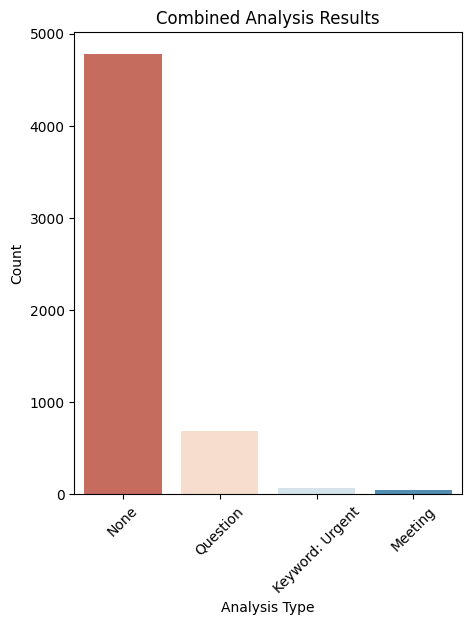

In [685]:
analysis_counts = df['Analysis_Type'].value_counts()
plt.figure(figsize=(5,6))
sns.barplot(x=analysis_counts.index, y=analysis_counts.values, palette='RdBu')
plt.title('Combined Analysis Results')
plt.xlabel('Analysis Type')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()


In [689]:
df = df[['Type', 'Message']]

df.dropna(inplace=True)
df['Type'] = df['Type'].map({'ham':0,'spam':1})
df['Message'] = df['Message'].apply(lambda x:word_tokenize(x.lower()))

stop_words = set(stopwords.words('english'))
df['Message'] = df['Message'].apply(lambda x: [ word for word in x if word in stop_words])


In [686]:
spam_words = [word for word_list in df[df['Type'] == 1]['Message'] for word in word_list]
spam_word_freq = Counter(spam_words)

non_spam_words = [word for word_list in df[df['Type'] == 0]['Message'] for word in word_list]
ham_word_freq = Counter(non_spam_words)

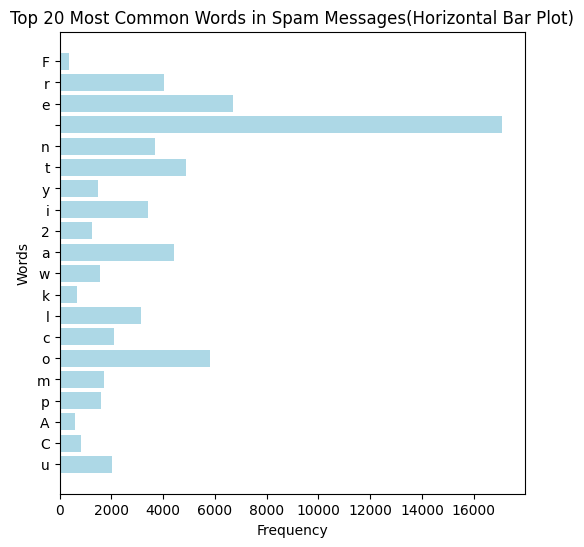

In [687]:
plt.figure(figsize=(6,6))
plt.barh(list(spam_word_freq.keys())[:20],list(spam_word_freq.values())[:20],color='lightblue')
plt.xlabel('Frequency')
plt.ylabel('Words')
plt.title('Top 20 Most Common Words in Spam Messages(Horizontal Bar Plot)')
plt.gca().invert_yaxis()
plt.show()

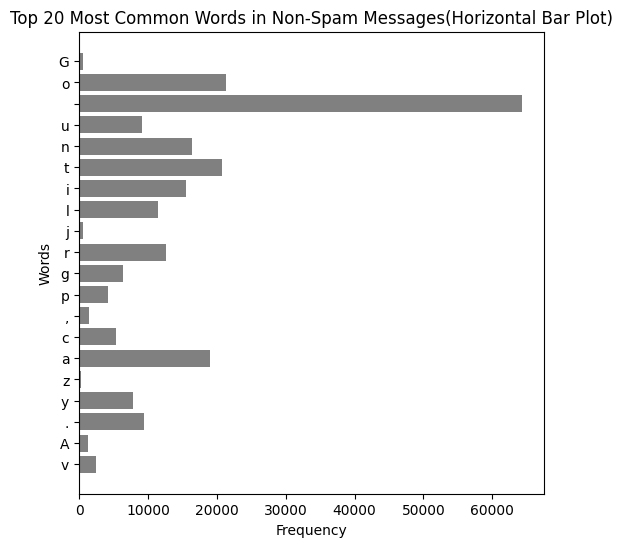

In [688]:
plt.figure(figsize=(6,6))
plt.barh(list(ham_word_freq.keys())[:20],list(ham_word_freq.values())[:20],color='grey')
plt.xlabel('Frequency')
plt.ylabel('Words')
plt.title('Top 20 Most Common Words in Non-Spam Messages(Horizontal Bar Plot)')
plt.gca().invert_yaxis()
plt.show()